In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
import xgboost as xgb
from xgboost import XGBClassifier


In [13]:
poll_data = pd.read_csv('presidential_polls_2020.csv')
poll_data.head()

,cycle,state,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,trend_and_house_adjusted_pct,tracking,poll_id,question_id
0,2020,Wyoming,10/27/2020,Joseph R. Biden Jr.,9/28/2020,10/25/2020,SurveyMonkey,654.0,lv,0.355849,0.355849,31.0,29.72329,29.76474,T,71978,134981
1,2020,Wyoming,10/27/2020,Joseph R. Biden Jr.,9/26/2020,10/24/2020,SurveyMonkey,649.0,lv,0.024280,0.024138,31.0,29.72329,29.77189,T,71893,134807
2,2020,Wyoming,10/27/2020,Joseph R. Biden Jr.,9/26/2020,10/23/2020,SurveyMonkey,638.0,lv,0.000000,0.000000,31.0,29.72329,29.78049,T,71826,134672
3,2020,Wyoming,10/27/2020,Joseph R. Biden Jr.,9/25/2020,10/22/2020,SurveyMonkey,616.0,lv,0.011784,0.011371,30.0,28.73825,28.84013,T,71765,134541
4,2020,Wyoming,10/27/2020,Joseph R. Biden Jr.,9/24/2020,10/21/2020,SurveyMonkey,605.0,lv,0.011547,0.011076,31.0,29.72329,29.83638,T,71682,134342


In [14]:
poll_data.isnull().sum()

cycle                              0
state                              0
modeldate                          0
candidate_name                     0
startdate                          0
enddate                            0
pollster                           0
samplesize                         2
population                         0
weight                             0
influence                          0
pct                                0
house_adjusted_pct                 0
trend_and_house_adjusted_pct       0
tracking                        3534
poll_id                            0
question_id                        0
dtype: int64

In [15]:
poll_data.describe()

,cycle,samplesize,weight,influence,pct,house_adjusted_pct,trend_and_house_adjusted_pct,poll_id,question_id
count,6376.0,6374.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000
mean,2020.0,3439.506432,0.568433,0.065914,47.111873,46.653722,47.306821,69280.395232,129423.397428
std,0.0,5146.643057,0.537149,0.195303,7.510800,7.260506,7.387173,2270.621544,4660.296883
min,2020.0,88.000000,0.000000,0.000000,8.000000,6.624857,6.939298,62570.000000,112864.000000
25%,2020.0,791.500000,0.067827,0.000000,43.000000,42.484088,42.873535,67795.750000,126887.750000
50%,2020.0,1098.000000,0.552710,0.000000,47.000000,46.633775,47.272855,70075.500000,130557.000000
75%,2020.0,3660.500000,0.884412,0.012761,51.000000,50.544690,51.637570,71160.250000,133236.750000
max,2020.0,34460.000000,4.441382,1.940268,90.530000,89.743520,90.235790,72046.000000,135071.000000


>To be scaled: samplesize, weight, influence, pct, house_adjusted_pct, trend_and_house_adjusted_pct

>To be dropped: cycle, question_id, poll_id

In [16]:
### BEGIN SOLUTION
# Number of rows
print(poll_data.shape)

# Column names
print(poll_data.columns.tolist())

# Data types
print(poll_data.dtypes)


(6376, 17)
['cycle', 'state', 'modeldate', 'candidate_name', 'startdate', 'enddate', 'pollster', 'samplesize', 'population', 'weight', 'influence', 'pct', 'house_adjusted_pct', 'trend_and_house_adjusted_pct', 'tracking', 'poll_id', 'question_id']
cycle                             int64
state                            object
modeldate                        object
candidate_name                   object
startdate                        object
enddate                          object
pollster                         object
samplesize                      float64
population                       object
weight                          float64
influence                       float64
pct                             float64
house_adjusted_pct              float64
trend_and_house_adjusted_pct    float64
tracking                         object
poll_id                           int64
question_id                       int64
dtype: object


Categorical Variables: 
state,
modeldate,
candidate_name,
startdate,
enddate,
pollster,

In [17]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cycle                         6376 non-null   int64  
 1   state                         6376 non-null   object 
 2   modeldate                     6376 non-null   object 
 3   candidate_name                6376 non-null   object 
 4   startdate                     6376 non-null   object 
 5   enddate                       6376 non-null   object 
 6   pollster                      6376 non-null   object 
 7   samplesize                    6374 non-null   float64
 8   population                    6376 non-null   object 
 9   weight                        6376 non-null   float64
 10  influence                     6376 non-null   float64
 11  pct                           6376 non-null   float64
 12  house_adjusted_pct            6376 non-null   float64
 13  tre

In [18]:
poll_data.isnull().sum()

cycle                              0
state                              0
modeldate                          0
candidate_name                     0
startdate                          0
enddate                            0
pollster                           0
samplesize                         2
population                         0
weight                             0
influence                          0
pct                                0
house_adjusted_pct                 0
trend_and_house_adjusted_pct       0
tracking                        3534
poll_id                            0
question_id                        0
dtype: int64

samplesize has 2 missing values
tracking has 3534 missing values

In [19]:
poll_data.state.value_counts()

state
National                1882
Wisconsin                504
Pennsylvania             278
Michigan                 268
North Carolina           244
Florida                  234
Arizona                  216
Texas                    160
Georgia                  158
Ohio                     110
Iowa                     104
Minnesota                102
California                84
Colorado                  78
New Hampshire             78
South Carolina            74
Montana                   72
Virginia                  70
Maine                     68
Nevada                    66
Missouri                  62
Kentucky                  60
Kansas                    58
New Jersey                58
Utah                      54
Alaska                    52
Alabama                   52
Washington                52
Oklahoma                  52
New York                  52
Massachusetts             50
Indiana                   48
Mississippi               48
New Mexico                48
Maryland

National polls is the most common in the dataset.

In [20]:
poll_data.groupby(['state', 'candidate_name']).size().reset_index(name='count')

,state,candidate_name,count
0,Alabama,Donald Trump,26
1,Alabama,Joseph R. Biden Jr.,26
2,Alaska,Donald Trump,26
3,Alaska,Joseph R. Biden Jr.,26
4,Arizona,Donald Trump,108
...,...,...,...
107,West Virginia,Joseph R. Biden Jr.,22
108,Wisconsin,Donald Trump,252
109,Wisconsin,Joseph R. Biden Jr.,252
110,Wyoming,Donald Trump,18


Distribution of both candidates are equal across all states, this implies the date structure needs some transformation to capture both candidates scores in common rows.

In [21]:
poll_data.candidate_name.value_counts()

candidate_name
Joseph R. Biden Jr.    3188
Donald Trump           3188
Name: count, dtype: int64

This further proves the previous point

In [22]:
#Make a copy of the original dataset
poll_copy = poll_data.copy()

In [23]:
# Group by candidate_name and state, then calculate average of pct values
averages = poll_copy.groupby(['candidate_name', 'state'])[['pct', 'house_adjusted_pct', 'trend_and_house_adjusted_pct']].mean()

# Reset index to get a flat DataFrame
averages = averages.reset_index()

# Rename the columns to include '_avg'
averages = averages.rename(columns={'pct': 'pct_avg', 'house_adjusted_pct': 'house_adjusted_pct_avg', 'trend_and_house_adjusted_pct': 'trend_and_house_adjusted_pct_avg'})


Lets plot for better view

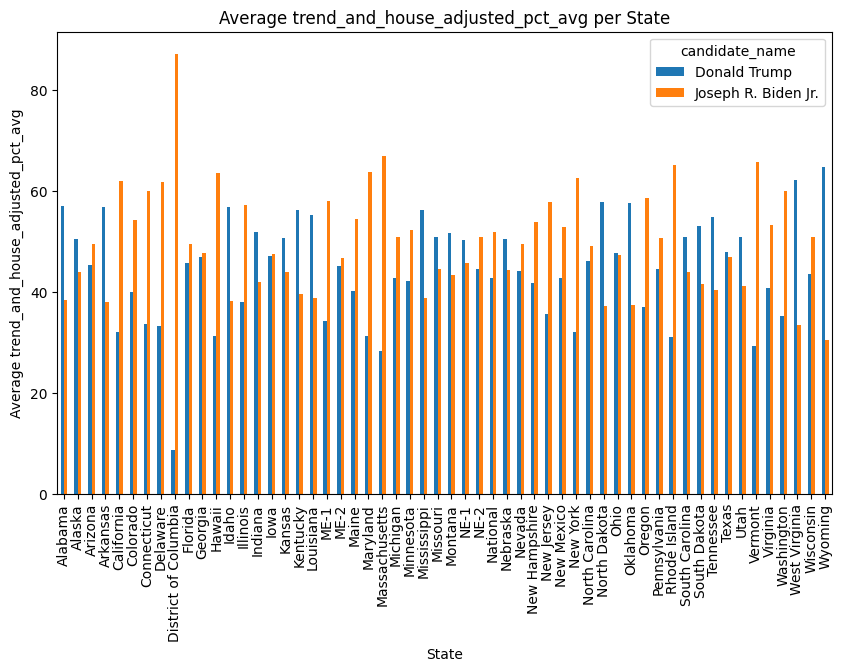

In [24]:
import matplotlib.pyplot as plt

# Pivot the data to create a column for each candidate
pivoted = averages.pivot(index='state', columns='candidate_name', values='trend_and_house_adjusted_pct_avg')

# Create a column chart
pivoted.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Average trend_and_house_adjusted_pct_avg per State')
plt.xlabel('State')
plt.ylabel('Average trend_and_house_adjusted_pct_avg')

# Show the plot
plt.show()

Joe Biden seems to lead Donald Trump in about 60% of the states including in National polls

In [25]:
poll_copy[['modeldate', 'enddate', 'startdate']] = poll_copy[['modeldate', 'enddate', 'startdate']].apply(pd.to_datetime)

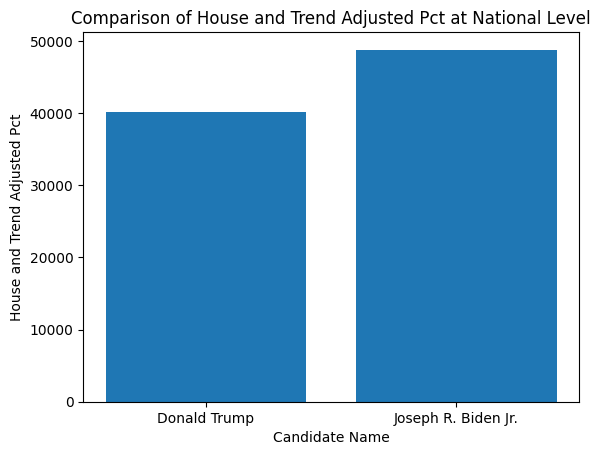

In [27]:
# Filter the data to only include national level
national_data = poll_copy[poll_copy['state'] == 'National']

# Group the data by candidate_name and calculate the mean of house_and_trend_adjusted_pct
national_data_grouped = national_data.groupby('candidate_name')['trend_and_house_adjusted_pct'].sum().reset_index()

# Create a column chart
plt.bar(national_data_grouped['candidate_name'], national_data_grouped['trend_and_house_adjusted_pct'])

# Add labels and title
plt.xlabel('Candidate Name')
plt.ylabel('House and Trend Adjusted Pct')
plt.title('Comparison of House and Trend Adjusted Pct at National Level')

# Display the plot
plt.show()


Joe Biden has more votes at the national level. Here I assume this is in place of National Electoral College Votes where I candidate must win to win the general in the US. This is a big factor in determining who wins the election togther with state level performance. 

In [29]:
poll_copy.loc[poll_copy['state'] == 'National', 'candidate_name'].value_counts()

candidate_name
Joseph R. Biden Jr.    941
Donald Trump           941
Name: count, dtype: int64

Both candidates appeared equally in the surveys at the National level

In [30]:
poll_copy.tracking.unique()

array(['T', nan], dtype=object)

Since tracking is a binary feature, I would assume that NAN are False values representing 0

In [31]:
poll_copy['tracking'] = poll_copy['tracking'].fillna('F')

In [32]:
poll_copy.isnull().sum()

cycle                           0
state                           0
modeldate                       0
candidate_name                  0
startdate                       0
enddate                         0
pollster                        0
samplesize                      2
population                      0
weight                          0
influence                       0
pct                             0
house_adjusted_pct              0
trend_and_house_adjusted_pct    0
tracking                        0
poll_id                         0
question_id                     0
dtype: int64

In [33]:
poll_copy[poll_copy['samplesize'].isnull()]


,cycle,state,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,trend_and_house_adjusted_pct,tracking,poll_id,question_id
1406,2020,National,2020-10-27,Joseph R. Biden Jr.,2020-09-08,2020-09-10,Socioanalítica Research,NaN,rv,0.795138,0.0,53.0,52.71292,53.88948,F,70559,131629
4594,2020,National,2020-10-27,Donald Trump,2020-09-08,2020-09-10,Socioanalítica Research,NaN,rv,0.795138,0.0,45.0,45.10679,45.17688,F,70559,131629


Two values are null in the sample size, I would simply use the mean to fill them both.

In [34]:
poll_copy['samplesize'] = poll_copy['samplesize'].fillna(poll_copy['samplesize'].mean())

In [35]:
poll_copy.isnull().sum()

cycle                           0
state                           0
modeldate                       0
candidate_name                  0
startdate                       0
enddate                         0
pollster                        0
samplesize                      0
population                      0
weight                          0
influence                       0
pct                             0
house_adjusted_pct              0
trend_and_house_adjusted_pct    0
tracking                        0
poll_id                         0
question_id                     0
dtype: int64

Lets Capture the EFFECTS of HOUSE, TREND, TREND/HOUSE on the PCT and see what was factored into PCT to get them.

In [36]:
# 1. adjustment_impact
poll_copy['adjustment_impact'] = poll_copy['trend_and_house_adjusted_pct'] - poll_copy['pct']

# 2. house_effect
poll_copy['house_effect'] = poll_copy['house_adjusted_pct'] - poll_copy['pct']

# 3. trend_effect
poll_copy['trend_effect'] = poll_copy['trend_and_house_adjusted_pct'] - poll_copy['house_adjusted_pct']

# 4. poll_to_poll_change
poll_copy['poll_to_poll_change'] = poll_copy.groupby('candidate_name')['trend_and_house_adjusted_pct'].diff()

In [37]:
poll_copy.head()

,cycle,state,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,...,pct,house_adjusted_pct,trend_and_house_adjusted_pct,tracking,poll_id,question_id,adjustment_impact,house_effect,trend_effect,poll_to_poll_change
0,2020,Wyoming,2020-10-27,Joseph R. Biden Jr.,2020-09-28,2020-10-25,SurveyMonkey,654.0,lv,0.355849,...,31.0,29.72329,29.76474,T,71978,134981,-1.23526,-1.27671,0.04145,NaN
1,2020,Wyoming,2020-10-27,Joseph R. Biden Jr.,2020-09-26,2020-10-24,SurveyMonkey,649.0,lv,0.024280,...,31.0,29.72329,29.77189,T,71893,134807,-1.22811,-1.27671,0.04860,0.00715
2,2020,Wyoming,2020-10-27,Joseph R. Biden Jr.,2020-09-26,2020-10-23,SurveyMonkey,638.0,lv,0.000000,...,31.0,29.72329,29.78049,T,71826,134672,-1.21951,-1.27671,0.05720,0.00860
3,2020,Wyoming,2020-10-27,Joseph R. Biden Jr.,2020-09-25,2020-10-22,SurveyMonkey,616.0,lv,0.011784,...,30.0,28.73825,28.84013,T,71765,134541,-1.15987,-1.26175,0.10188,-0.94036
4,2020,Wyoming,2020-10-27,Joseph R. Biden Jr.,2020-09-24,2020-10-21,SurveyMonkey,605.0,lv,0.011547,...,31.0,29.72329,29.83638,T,71682,134342,-1.16362,-1.27671,0.11309,0.99625


In [38]:
poll_copy['poll_to_poll_change'] = poll_copy['poll_to_poll_change'].fillna(0)


In [39]:
poll_copy.population.value_counts()

population
lv    5190
rv     980
v      134
a       72
Name: count, dtype: int64

In [40]:
# One-hot encoding
poll_copy = pd.get_dummies(poll_copy, columns=['population'], prefix='population', drop_first=True)


In [41]:
# Rename columns
poll_copy = poll_copy.rename(columns={
    'population_rv': 'registered_voters',
	'population_v': 'voters',
	'population_lv': 'likely_voters'})

Dummy columns renamed

In [42]:
first_occurrences = poll_copy.drop_duplicates(subset='candidate_name', keep='first')[['cycle', 'state', 'modeldate', 'candidate_name', 'startdate', 'enddate',
       'pollster', 'samplesize', 'weight', 'influence', 'pct',
       'house_adjusted_pct', 'trend_and_house_adjusted_pct', 'tracking',
       'poll_id', 'question_id', 'adjustment_impact', 'house_effect',
       'trend_effect', 'poll_to_poll_change', 'likely_voters',
       'registered_voters', 'voters']]


In [43]:
first_occurrences

,cycle,state,modeldate,candidate_name,startdate,enddate,pollster,samplesize,weight,influence,...,tracking,poll_id,question_id,adjustment_impact,house_effect,trend_effect,poll_to_poll_change,likely_voters,registered_voters,voters
0,2020,Wyoming,2020-10-27,Joseph R. Biden Jr.,2020-09-28,2020-10-25,SurveyMonkey,654.0,0.355849,0.355849,...,T,71978,134981,-1.23526,-1.27671,0.04145,0.0,True,False,False
3188,2020,Wyoming,2020-10-27,Donald Trump,2020-09-28,2020-10-25,SurveyMonkey,654.0,0.355849,0.355849,...,T,71978,134981,-2.47153,-2.63552,0.16399,0.0,True,False,False


The weight, influence, samplesize are the same for common poll_id

In [44]:
first_occurrences[['candidate_name','pct']]

,candidate_name,pct
0,Joseph R. Biden Jr.,31.0
3188,Donald Trump,67.0


This shows complementary poll scores! Time to transform and change the structure of the dataset to reduce data redundancy

In [45]:
# Filter rows for Donald Trump
trump_rows = poll_copy[poll_copy['candidate_name'] == 'Donald Trump'].copy()

# Add Trump prefix to columns
trump_rows.rename(columns={
	'adjustment_impact': 'Trump_adjustment_impact',
	'house_effect': 'Trump_house_effect',
	'trend_effect': 'Trump_trend_effect',
	'poll_to_poll_change': 'Trump_poll_to_poll_change',
}, inplace=True)

# Add Trump prefix to pct columns
trump_rows.rename(columns=lambda x: 'Trump_' + x if 'pct' in x else x, inplace=True)


Keep Trump specific values on a separate table

In [46]:
trump_rows.head()

,cycle,state,modeldate,candidate_name,startdate,enddate,pollster,samplesize,weight,influence,...,tracking,poll_id,question_id,Trump_adjustment_impact,Trump_house_effect,Trump_trend_effect,Trump_poll_to_poll_change,likely_voters,registered_voters,voters
3188,2020,Wyoming,2020-10-27,Donald Trump,2020-09-28,2020-10-25,SurveyMonkey,654.0,0.355849,0.355849,...,T,71978,134981,-2.47153,-2.63552,0.16399,0.00000,True,False,False
3189,2020,Wyoming,2020-10-27,Donald Trump,2020-09-26,2020-10-24,SurveyMonkey,649.0,0.024280,0.024138,...,T,71893,134807,-2.46684,-2.63552,0.16868,0.00469,True,False,False
3190,2020,Wyoming,2020-10-27,Donald Trump,2020-09-26,2020-10-23,SurveyMonkey,638.0,0.000000,0.000000,...,T,71826,134672,-2.46358,-2.63552,0.17194,0.00326,True,False,False
3191,2020,Wyoming,2020-10-27,Donald Trump,2020-09-25,2020-10-22,SurveyMonkey,616.0,0.011784,0.011371,...,T,71765,134541,-2.42966,-2.61150,0.18184,1.03392,True,False,False
3192,2020,Wyoming,2020-10-27,Donald Trump,2020-09-24,2020-10-21,SurveyMonkey,605.0,0.011547,0.011076,...,T,71682,134342,-2.45023,-2.63552,0.18529,-1.02057,True,False,False


In [47]:


trump_rows_select = trump_rows[['Trump_pct', 'poll_id',
       'Trump_house_adjusted_pct', 'Trump_trend_and_house_adjusted_pct', 'Trump_adjustment_impact',
       'Trump_house_effect', 'Trump_trend_effect', 'Trump_poll_to_poll_change']]

Select the important columns

In [48]:
# Drop rows with Donald Trump
poll_copy = poll_copy[poll_copy['candidate_name'] != 'Donald Trump']

Drop rows in the data copy that has trump in the candidate column

In [49]:
# Merge with original DataFrame
merged_poll = poll_copy.merge(trump_rows_select, how='inner', on='poll_id')


Join the two datasets for both candidates

In [50]:
# Get the column names of both DataFrames
columns_df1 = set(poll_copy.columns)
columns_df2 = set(trump_rows_select.columns)

# Find the common columns
common_columns = columns_df1 & columns_df2
print("Common columns:", common_columns)


Common columns: {'poll_id'}


Check to ensure no column is dupliacted

In [51]:
merged_poll.shape

(3188, 30)

Data dimension now: 3188 by 30

In [52]:
import pandas as pd
import itertools

# assuming df is your DataFrame

# Get all possible combinations of columns
column_combinations = list(itertools.combinations(merged_poll.columns, 2))

# Check each combination of columns
for cols in column_combinations:
	col1, col2 = cols
	if merged_poll[col1].equals(merged_poll[col2]):
		print(f"Columns {col1} and {col2} have exactly the same values")


No two columns has same values

In [53]:
merged_poll.drop(['poll_id', 'candidate_name'], axis= 1, inplace=True)

Drop unnecessary columns

In [54]:
merged_poll.rename(columns={'pct':'Biden_pct', 'house_adjusted_pct':'Biden_house_adjusted_pct', 
'trend_and_house_adjusted_pct': 'Biden_trend_and_house_adjusted_pct', 'adjustment_impact':'Biden_adjustment_impact',
'house_effect':'Biden_house_effect', 'trend_effect':'Biden_trend_effect', 'poll_to_poll_change':'Biden_poll_to_poll_change'}, inplace=True)

Renamed Biden-specific columns to reflect that it belongs to him

## Lets use the USA election winner determining feature to engineer the poll winners

In [55]:
merged_poll['poll_winner'] = np.where(
	merged_poll['Trump_trend_and_house_adjusted_pct'] > merged_poll['Biden_trend_and_house_adjusted_pct'],
	'Trump_won',
	'Biden_won'
)


In [56]:
merged_poll.head()

,cycle,state,modeldate,startdate,enddate,pollster,samplesize,weight,influence,Biden_pct,...,registered_voters,voters,Trump_pct,Trump_house_adjusted_pct,Trump_trend_and_house_adjusted_pct,Trump_adjustment_impact,Trump_house_effect,Trump_trend_effect,Trump_poll_to_poll_change,poll_winner
0,2020,Wyoming,2020-10-27,2020-09-28,2020-10-25,SurveyMonkey,654.0,0.355849,0.355849,31.0,...,False,False,67.0,64.36448,64.52847,-2.47153,-2.63552,0.16399,0.00000,Trump_won
1,2020,Wyoming,2020-10-27,2020-09-26,2020-10-24,SurveyMonkey,649.0,0.024280,0.024138,31.0,...,False,False,67.0,64.36448,64.53316,-2.46684,-2.63552,0.16868,0.00469,Trump_won
2,2020,Wyoming,2020-10-27,2020-09-26,2020-10-23,SurveyMonkey,638.0,0.000000,0.000000,31.0,...,False,False,67.0,64.36448,64.53642,-2.46358,-2.63552,0.17194,0.00326,Trump_won
3,2020,Wyoming,2020-10-27,2020-09-25,2020-10-22,SurveyMonkey,616.0,0.011784,0.011371,30.0,...,False,False,68.0,65.38850,65.57034,-2.42966,-2.61150,0.18184,1.03392,Trump_won
4,2020,Wyoming,2020-10-27,2020-09-24,2020-10-21,SurveyMonkey,605.0,0.011547,0.011076,31.0,...,False,False,67.0,64.36448,64.54977,-2.45023,-2.63552,0.18529,-1.02057,Trump_won


<Axes: xlabel='poll_winner'>

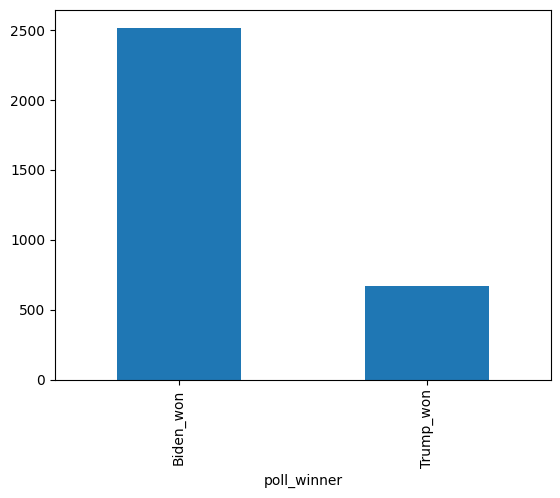

In [57]:
merged_poll.poll_winner.value_counts().plot(kind= 'bar')

Biden won 2518 times out of 3188 polls conducted.

In [58]:
further_analysis_data = merged_poll[['state',
       'samplesize', 'weight', 'influence', 'Biden_pct',
       'Biden_house_adjusted_pct', 'Biden_trend_and_house_adjusted_pct',
       'tracking', 'Biden_adjustment_impact',
       'Biden_house_effect', 'Biden_trend_effect', 'Biden_poll_to_poll_change',
       'likely_voters', 'registered_voters', 'voters', 'Trump_pct',
       'Trump_house_adjusted_pct', 'Trump_trend_and_house_adjusted_pct',
       'Trump_adjustment_impact', 'Trump_house_effect', 'Trump_trend_effect',
       'Trump_poll_to_poll_change', 'poll_winner']]

Lets identify states with high electoral votes at the national level

In [59]:
# Define the high electoral vote threshold
high_electoral_vote_threshold = 15

# Create a dictionary mapping state names to their electoral votes
electoral_votes_by_state = {
	'Alabama': 9,
	'Alaska': 3,
	'Arizona': 11,
	'Arkansas': 6,
	'California': 55,
	'Colorado': 9,
	'Connecticut': 7,
	'Delaware': 3,
	'Florida': 29,
	'Georgia': 16,
	'Hawaii': 4,
	'Idaho': 4,
	'Illinois': 20,
	'Indiana': 11,
	'Iowa': 6,
	'Kansas': 6,
	'Kentucky': 8,
	'Louisiana': 8,
	'Maine': 4,
	'Maryland': 10,
	'Massachusetts': 11,
	'Michigan': 16,
	'Minnesota': 10,
	'Mississippi': 6,
	'Missouri': 10,
	'Montana': 3,
	'Nebraska': 5,
	'Nevada': 6,
	'New Hampshire': 4,
	'New Jersey': 14,
	'New Mexico': 5,
	'New York': 29,
	'North Carolina': 15,
	'North Dakota': 3,
	'Ohio': 18,
	'Oklahoma': 7,
	'Oregon': 7,
	'Pennsylvania': 20,
	'Rhode Island': 4,
	'South Carolina': 9,
	'South Dakota': 3,
	'Tennessee': 11,
	'Texas': 38,
	'Utah': 6,
	'Vermont': 3,
	'Virginia': 13,
	'Washington': 12,
	'West Virginia': 5,
	'Wisconsin': 10,
	'Wyoming': 3
}
# Create a binary feature indicating high electoral votes
further_analysis_data['high_electoral_votes'] = further_analysis_data['state'].map(electoral_votes_by_state) >= high_electoral_vote_threshold


C:\Users\User\AppData\Local\Temp\ipykernel_1184\2480496265.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  further_analysis_data['high_electoral_votes'] = further_analysis_data['state'].map(electoral_votes_by_state) >= high_electoral_vote_threshold


In [60]:
further_analysis_data.head()

,state,samplesize,weight,influence,Biden_pct,Biden_house_adjusted_pct,Biden_trend_and_house_adjusted_pct,tracking,Biden_adjustment_impact,Biden_house_effect,...,voters,Trump_pct,Trump_house_adjusted_pct,Trump_trend_and_house_adjusted_pct,Trump_adjustment_impact,Trump_house_effect,Trump_trend_effect,Trump_poll_to_poll_change,poll_winner,high_electoral_votes
0,Wyoming,654.0,0.355849,0.355849,31.0,29.72329,29.76474,T,-1.23526,-1.27671,...,False,67.0,64.36448,64.52847,-2.47153,-2.63552,0.16399,0.00000,Trump_won,False
1,Wyoming,649.0,0.024280,0.024138,31.0,29.72329,29.77189,T,-1.22811,-1.27671,...,False,67.0,64.36448,64.53316,-2.46684,-2.63552,0.16868,0.00469,Trump_won,False
2,Wyoming,638.0,0.000000,0.000000,31.0,29.72329,29.78049,T,-1.21951,-1.27671,...,False,67.0,64.36448,64.53642,-2.46358,-2.63552,0.17194,0.00326,Trump_won,False
3,Wyoming,616.0,0.011784,0.011371,30.0,28.73825,28.84013,T,-1.15987,-1.26175,...,False,68.0,65.38850,65.57034,-2.42966,-2.61150,0.18184,1.03392,Trump_won,False
4,Wyoming,605.0,0.011547,0.011076,31.0,29.72329,29.83638,T,-1.16362,-1.27671,...,False,67.0,64.36448,64.54977,-2.45023,-2.63552,0.18529,-1.02057,Trump_won,False


In [61]:
# Filter the data to only include high electoral vote states
high_electoral_vote_states = further_analysis_data[further_analysis_data['high_electoral_votes'] == True]

# Group the data by poll_winner and count the number of high electoral vote states won
poll_winner_wins = high_electoral_vote_states.groupby('poll_winner')['state'].count().reset_index()

# Rename the count column to 'high_electoral_vote_states_won'
poll_winner_wins = poll_winner_wins.rename(columns={'state': 'high_electoral_vote_states_won'})

# Print the results
poll_winner_wins

,poll_winner,high_electoral_vote_states_won
0,Biden_won,674
1,Trump_won,139


Joe Biden won more polls in states with High Electoral votes.

In [62]:
further_analysis_data.dtypes

state                                  object
samplesize                            float64
weight                                float64
influence                             float64
Biden_pct                             float64
Biden_house_adjusted_pct              float64
Biden_trend_and_house_adjusted_pct    float64
tracking                               object
Biden_adjustment_impact               float64
Biden_house_effect                    float64
Biden_trend_effect                    float64
Biden_poll_to_poll_change             float64
likely_voters                            bool
registered_voters                        bool
voters                                   bool
Trump_pct                             float64
Trump_house_adjusted_pct              float64
Trump_trend_and_house_adjusted_pct    float64
Trump_adjustment_impact               float64
Trump_house_effect                    float64
Trump_trend_effect                    float64
Trump_poll_to_poll_change         

In [63]:
# Identify boolean columns
bool_cols = further_analysis_data.select_dtypes(include=[bool]).columns

# Convert boolean columns to float
for col in bool_cols:
    further_analysis_data[col] = further_analysis_data[col].astype(float)

# Replace True with 1 and False with 0
further_analysis_data[bool_cols] = further_analysis_data[bool_cols].replace({True: 1, False: 0})


C:\Users\User\AppData\Local\Temp\ipykernel_1184\2586806906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  further_analysis_data[col] = further_analysis_data[col].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_1184\2586806906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  further_analysis_data[col] = further_analysis_data[col].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_1184\2586806906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [64]:
further_analysis_data.dtypes

state                                  object
samplesize                            float64
weight                                float64
influence                             float64
Biden_pct                             float64
Biden_house_adjusted_pct              float64
Biden_trend_and_house_adjusted_pct    float64
tracking                               object
Biden_adjustment_impact               float64
Biden_house_effect                    float64
Biden_trend_effect                    float64
Biden_poll_to_poll_change             float64
likely_voters                         float64
registered_voters                     float64
voters                                float64
Trump_pct                             float64
Trump_house_adjusted_pct              float64
Trump_trend_and_house_adjusted_pct    float64
Trump_adjustment_impact               float64
Trump_house_effect                    float64
Trump_trend_effect                    float64
Trump_poll_to_poll_change         

In [65]:
further_analysis_data['tracking'] = further_analysis_data['tracking'].replace({'F': 0, 'T': 1})
further_analysis_data['tracking'] = further_analysis_data['tracking'].astype(float)


C:\Users\User\AppData\Local\Temp\ipykernel_1184\1615795833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  further_analysis_data['tracking'] = further_analysis_data['tracking'].replace({'F': 0, 'T': 1})
C:\Users\User\AppData\Local\Temp\ipykernel_1184\1615795833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  further_analysis_data['tracking'] = further_analysis_data['tracking'].astype(float)


In [66]:
further_analysis_data['poll_winner'] = further_analysis_data['poll_winner'].replace({'Trump_won': 0, 'Biden_won': 1})
further_analysis_data['poll_winner'] = further_analysis_data['poll_winner'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_1184\3564074214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  further_analysis_data['poll_winner'] = further_analysis_data['poll_winner'].replace({'Trump_won': 0, 'Biden_won': 1})
C:\Users\User\AppData\Local\Temp\ipykernel_1184\3564074214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  further_analysis_data['poll_winner'] = further_analysis_data['poll_winner'].astype(float)


In [67]:
further_analysis_data.dtypes

state                                  object
samplesize                            float64
weight                                float64
influence                             float64
Biden_pct                             float64
Biden_house_adjusted_pct              float64
Biden_trend_and_house_adjusted_pct    float64
tracking                              float64
Biden_adjustment_impact               float64
Biden_house_effect                    float64
Biden_trend_effect                    float64
Biden_poll_to_poll_change             float64
likely_voters                         float64
registered_voters                     float64
voters                                float64
Trump_pct                             float64
Trump_house_adjusted_pct              float64
Trump_trend_and_house_adjusted_pct    float64
Trump_adjustment_impact               float64
Trump_house_effect                    float64
Trump_trend_effect                    float64
Trump_poll_to_poll_change         

In [68]:
first_model_data=further_analysis_data[['state','samplesize', 'weight', 'influence', 'Biden_pct',
       'Biden_house_adjusted_pct', 'Biden_trend_and_house_adjusted_pct',
       'tracking', 'Biden_adjustment_impact', 'Biden_house_effect',
       'Biden_trend_effect', 'Biden_poll_to_poll_change', 'likely_voters',
       'registered_voters', 'voters', 'Trump_pct', 'Trump_house_adjusted_pct',
       'Trump_trend_and_house_adjusted_pct', 'Trump_adjustment_impact',
       'Trump_house_effect', 'Trump_trend_effect', 'Trump_poll_to_poll_change',
       'poll_winner', 'high_electoral_votes']]

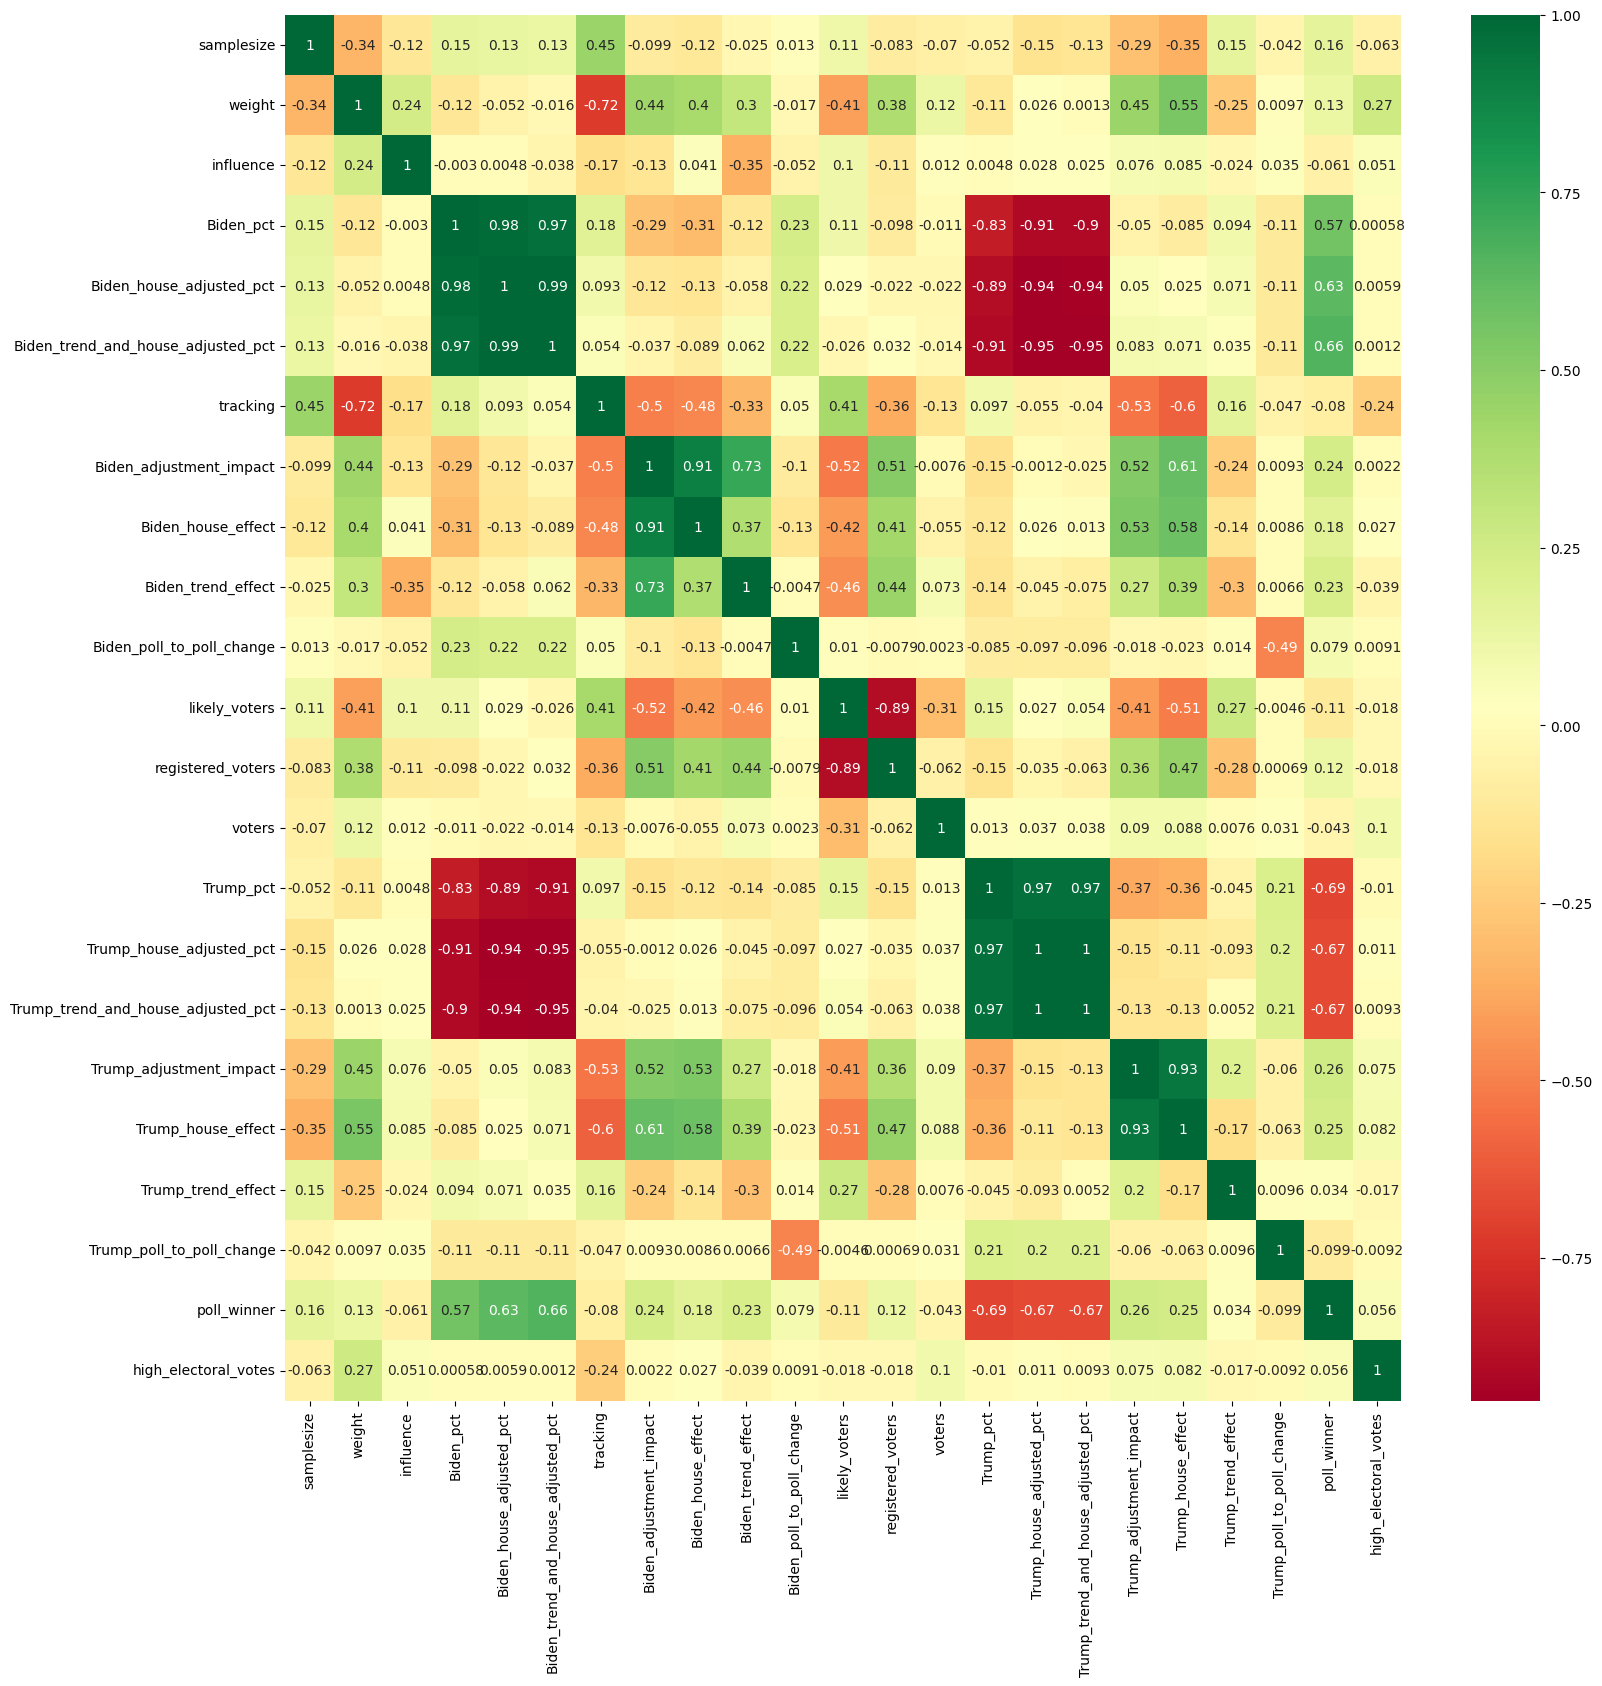

In [69]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(first_model_data.drop('state', axis=1).corr(),annot=True,cmap='RdYlGn')

plt.show()

To minimise and eliminate the impact of multcollinearity, I am going to drop columns with high colleration amongst themselves.

In [70]:
first_model_data.drop(['Biden_pct', 'Trump_pct', 'Biden_house_adjusted_pct', 'Trump_house_adjusted_pct',
'Biden_trend_and_house_adjusted_pct', 'Trump_trend_and_house_adjusted_pct'], axis =1, inplace=True)

In [71]:
target= 'poll_winner'
first_model_data[target].value_counts(normalize=True)

poll_winner
1.0    0.789837
0.0    0.210163
Name: proportion, dtype: float64

Biden won 78.9% of the overall survey. This is imbalance, so I would use stratify split method to ensure the data is split in a way to maintain this proportion. 

In [101]:
rs=123
# Grid search hyperparameters for a random forest model
def grid_search_rf(X_train, y_train):
    params_grid = { 
        'max_depth': [5, 10, 15, 20], 
        'n_estimators': [25, 50, 100], 
        'min_samples_split': [2, 5], 
        'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}] 
    }
    rf_model = RandomForestClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model, param_grid = params_grid, scoring='f1', cv = 5, verbose = 1)
    grid_search.fit(X_train.drop(['state'], axis=1), y_train)
    preds = preds = grid_search.predict(x_test.drop(['state'], axis=1))
    probs = grid_search.predict_proba(x_test.drop(['state'], axis=1))[:, 1]
    probs_df = pd.DataFrame({'STATE': x_test['state'], 'PROBABILITY': probs, 'PREDICTION':preds})
    print(probs_df)

    
    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print('Confusion Matrix - Random Forest:\n', cm)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='Random Forest')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    # Classification metrics report
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print('Metrics - Random Forest:')
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)

    # Feature importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.drop(['state'], axis=1).columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances)
    plt.title('Feature Importances - Random Forest')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.show()
    

    

# Grid search hyperparameters for a XGBoost model
def grid_search_xgb(X_train, y_train):
    params_grid = {
        'max_depth': [5, 10, 15, 20],
        'n_estimators': [25, 50, 100],
        'learning_rate': [0.1, 0.5, 1],
        'gamma': [0, 0.1, 0.5],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    }
    xgb_model = XGBClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='f1', cv=4, verbose=1)
    grid_search.fit(X_train.drop('state', axis=1), y_train)
    preds = grid_search.predict(x_test.drop('state', axis=1))
    probs = grid_search.predict_proba(x_test.drop(['state'], axis=1))[:, 1]
    probs_df = pd.DataFrame({'STATE': x_test['state'], 'PROBABILITY': probs, 'PREDICTION':preds})
    print(probs_df)

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print('Confusion Matrix - XGBoost:\n', cm)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='XGBoost')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - XGBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Feature importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.drop('state', axis=1).columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances)
    plt.title('Feature Importances - XGBoost')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.show()

     # Classification metrics report
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print('Metrics - XGBoost:')
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)


In [91]:
def split_data(df):
    X = df.loc[ : , df.columns != 'poll_winner']
    y = df['poll_winner'].astype('int')
    return train_test_split(X, y, test_size=0.3, stratify=y, random_state = rs)

In [92]:
# Split the training and testing dataset
x_train, x_test, y_train, y_test = split_data(first_model_data)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
             STATE  PROBABILITY  PREDICTION
1483      National     0.968691           1
69       Wisconsin     0.907104           1
1684      National     0.949412           1
2748       Florida     0.869575           1
3149        Alaska     0.703910           1
...            ...          ...         ...
430          Texas     0.490000           0
1307      National     1.000000           1
562   Rhode Island     0.950000           1
1495      National     0.987930           1
1698      National     1.000000           1

[957 rows x 3 columns]
Confusion Matrix - Random Forest:
 [[116  85]
 [ 11 745]]


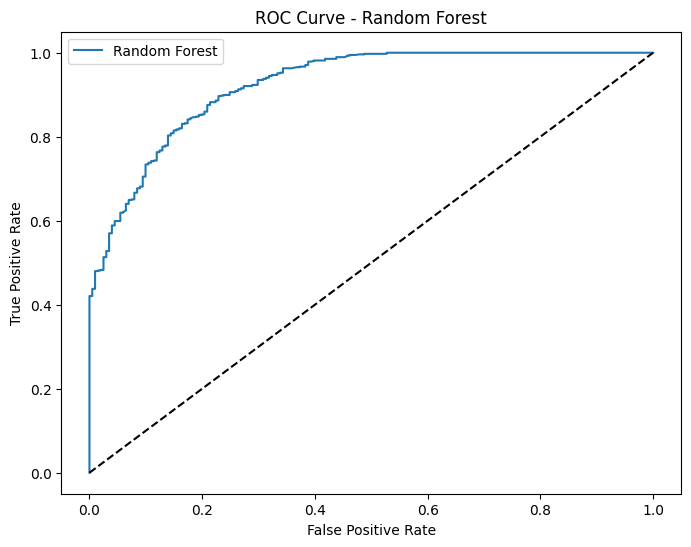

Metrics - Random Forest:
F1 Score: 0.9394703656998739
Recall: 0.9854497354497355
Precision: 0.8975903614457831
Accuracy: 0.8996865203761756


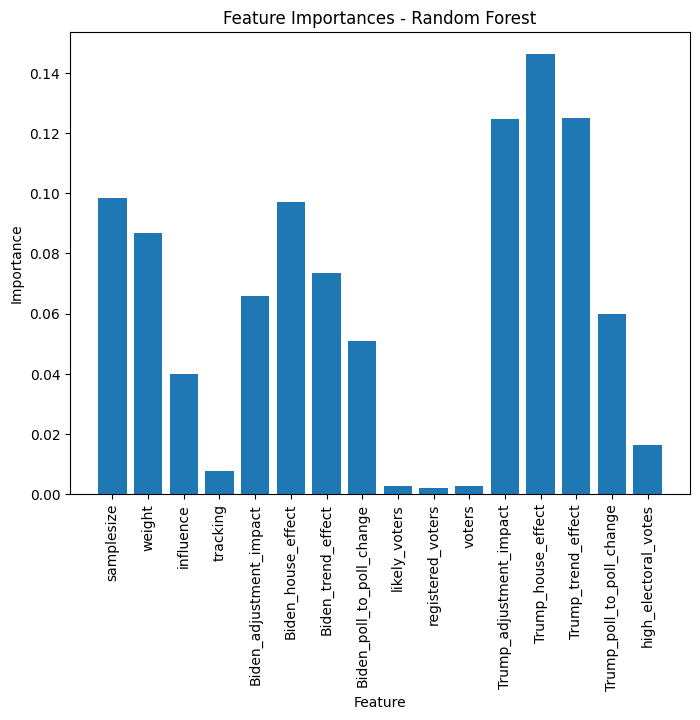

In [99]:
grid_search_rf(x_train, y_train)

Random Forest performed way better than Logistics regression with better F1 and recall scores on 0 class of 0.71 and 0.58 respectively. 

Fitting 4 folds for each of 972 candidates, totalling 3888 fits
             STATE  PROBABILITY  PREDICTION
1483      National     0.931172           1
69       Wisconsin     0.876682           1
1684      National     0.990620           1
2748       Florida     0.942982           1
3149        Alaska     0.874580           1
...            ...          ...         ...
430          Texas     0.226737           0
1307      National     0.993263           1
562   Rhode Island     0.841598           1
1495      National     0.859845           1
1698      National     0.995229           1

[957 rows x 3 columns]
Confusion Matrix - XGBoost:
 [[116  85]
 [ 10 746]]


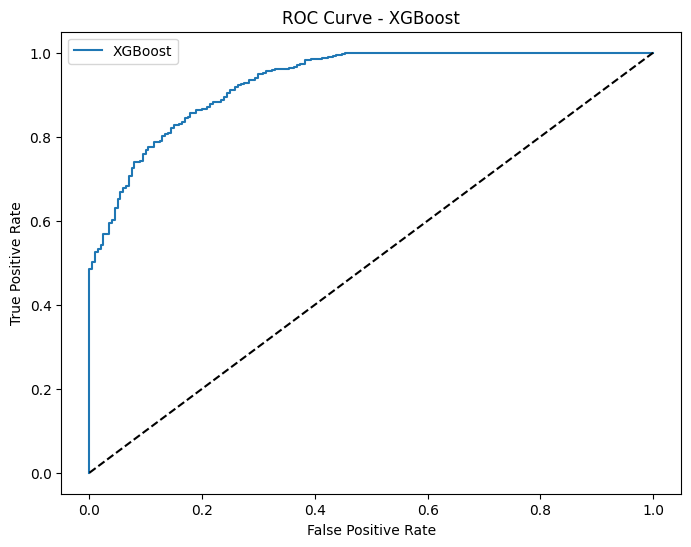

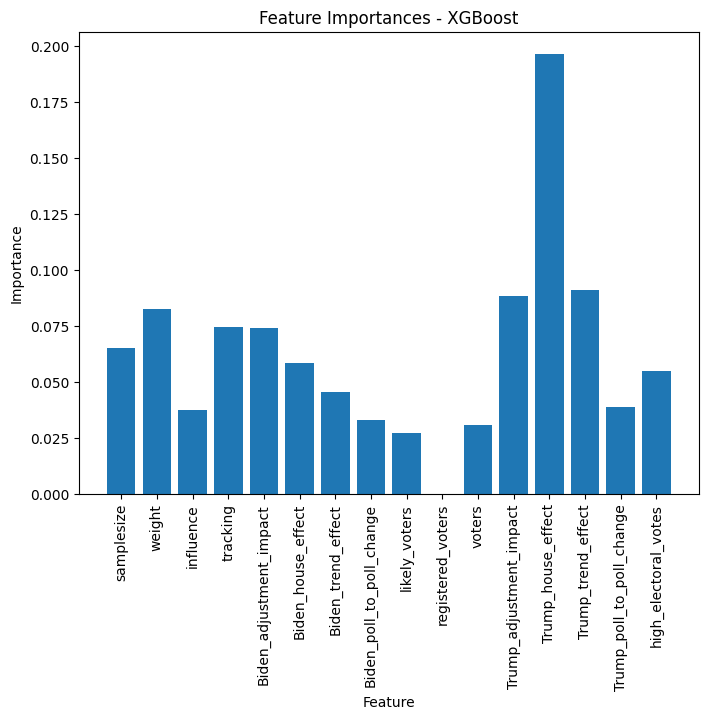

Metrics - XGBoost:
F1 Score: 0.9401386263390044
Recall: 0.9867724867724867
Precision: 0.8977135980746089
Accuracy: 0.9007314524555904


In [102]:
grid_search_xgb(x_train, y_train)

Xgboost generalised better to the class imbalance with improved F1 and recall scores on zero class of 0.74 and 0.65 respectively.